In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

import mavenn



In [2]:
MPSA_data_lib1_rep1 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib1_rep1.csv')
MPSA_data_lib1_rep2 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib1_rep2.csv')
MPSA_data_lib1_rep3 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib1_rep3.csv')

MPSA_data_lib2_rep1 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib2_rep1.csv')
MPSA_data_lib2_rep2 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib2_rep2.csv')
MPSA_data_lib2_rep3 = pd.read_csv('data/20.08.16_mpsa_data/brca2_lib2_rep3.csv')


In [3]:
#MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss')
MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer') \
                             .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep3,on='ss',how='outer')        

print(len(MPSA_df))                
MPSA_df.head()

26661


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:9191: FutureWarning: Passing 'suffixes' which cause duplicate columns {'dlog_psi_x', 'log_psi_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,ss,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y
0,AAAGCAAAA,-3.751854,0.444200,-3.115981,0.404293,-2.690113,0.649725,-2.238407,0.463122,-2.900128,0.667861,-0.824806,0.194917
1,AAAGCAAAC,-2.697741,0.369972,-2.991176,0.552104,-1.690878,0.212487,-1.741498,0.834194,-4.394449,0.375559,-0.813106,0.274446
2,AAAGCAAAG,-2.242947,0.575121,-2.666159,0.413834,-1.716336,0.316662,-3.850148,0.751362,-4.934474,0.266520,-1.062409,0.279566
3,AAAGCAAAT,-3.067251,0.357014,-2.823078,0.343901,-1.837513,0.206056,-3.044522,0.680854,-5.493061,0.230119,-1.241713,0.151308
4,AAAGCAACA,-2.987074,0.472637,-2.489996,0.368131,-2.186586,0.266041,-2.619385,0.631789,-3.571543,0.748902,-1.351066,0.219278


In [4]:
MPSA_df.dropna(inplace=True)
print(len(MPSA_df))  

20700


In [5]:
MPSA_df.columns = ['ss', 'log_psi__lib_1_rep1', 'dlog_psi_x', 'log_psi__lib_1_rep2', 'dlog_psi_y', 'log_psi__lib_1_rep3',
       'dlog_psi_x', 'log_psi__lib_2_rep1', 'dlog_psi_y', 'log_psi__lib_2_rep2', 'dlog_psi_x',
       'log_psi__lib_2_rep3', 'dlog_psi_y']


In [6]:
X = MPSA_df['ss'].values
y1 = MPSA_df['log_psi__lib_1_rep1'].values
y2 = MPSA_df['log_psi__lib_1_rep2'].values
y3 = MPSA_df['log_psi__lib_1_rep3'].values

y4 = MPSA_df['log_psi__lib_2_rep1'].values
y5 = MPSA_df['log_psi__lib_2_rep2'].values
y6 = MPSA_df['log_psi__lib_2_rep3'].values

In [7]:
diag = np.linspace(min(y1),max(y1),100)

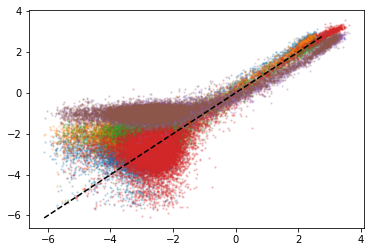

In [8]:
plt.scatter(y1,y2,s=2,alpha=0.2)
plt.scatter(y1,y3,s=2,alpha=0.2)
plt.scatter(y2,y3,s=2,alpha=0.2)

plt.scatter(y4,y5,s=2,alpha=0.2)
plt.scatter(y4,y6,s=2,alpha=0.2)
plt.scatter(y5,y6,s=2,alpha=0.2)

plt.plot(diag,diag,'--',color='black')
plt.show()

In [9]:

y = np.hstack(
    (y1.reshape(-1,1),
     y2.reshape(-1,1),
     y3.reshape(-1,1)))
#      y4.reshape(-1,1),
#      y5.reshape(-1,1),
#      y6.reshape(-1,1)))


In [10]:
y.shape

(20700, 3)

In [11]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
x_train[0]

'ACCGCAACT'

In [13]:
L = len(x_train[0])
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet=['A','C','G','T'])

mp_GE_1 = mavenn.measurement_process_layers.GlobalEpsitasisMP(K=50)
mp_GE_2 = mavenn.measurement_process_layers.GlobalEpsitasisMP(K=50)
mp_GE_3 = mavenn.measurement_process_layers.GlobalEpsitasisMP(K=50)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[mp_GE_1,mp_GE_2,mp_GE_3])

2022-03-28 23:39:45.323355: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# # Get sequence length
# L = len(X[0])

# # Define model
# model = mavenn.Model(L=L,
#                      alphabet='dna',
#                      gpmap_type='additive', 
#                      regression_type='Multi_y_GE',
#                      ge_noise_model_type='SkewedT',
#                      ge_heteroskedasticity_order=2,
#                      #ge_nonlinearity_hidden_nodes=5,
#                      number_of_replicate_targets = y_train.shape[1])

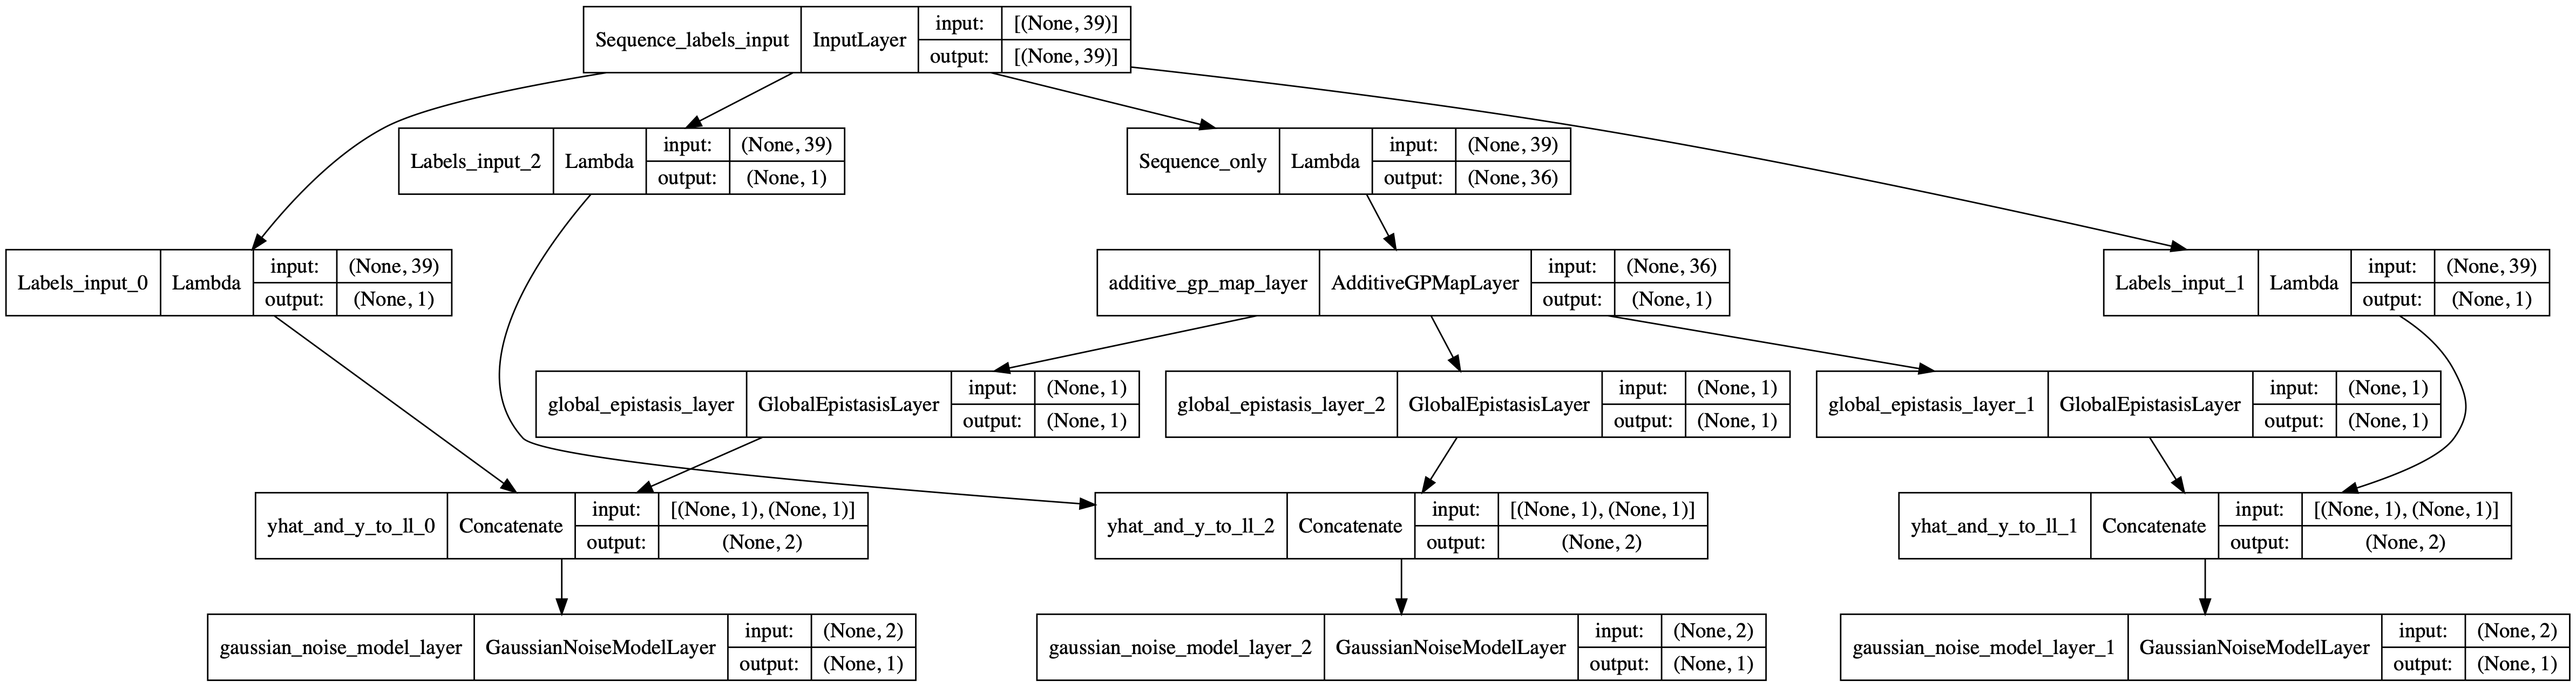

In [15]:

from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)

In [16]:
#y_list = [y1, y2, y3]
y_list = [y_train[:,0],y_train[:,1],y_train[:,2]]


In [17]:
# Set training data
model.set_data(x=x_train,
               y_list=y_list,
               shuffle=False)

N = 16,560 observations set as training data.
Using 20.0% for validation.
Time to set data: 0.845 sec.


In [18]:
x_train.shape

(16560,)

In [19]:
# Fit model to data
model.fit(learning_rate=.0005,
          epochs=100,
          try_tqdm=False,
          batch_size=50,
          early_stopping=False,
          #early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/100
265/265 [==============================] - 3s 4ms/step - loss: 216.8122 - gaussian_noise_model_layer_loss: 72.4738 - gaussian_noise_model_layer_1_loss: 71.9847 - gaussian_noise_model_layer_2_loss: 72.3476 - I_var: -1.1181 - val_loss: 211.3993 - val_gaussian_noise_model_layer_loss: 70.2279 - val_gaussian_noise_model_layer_1_loss: 70.5621 - val_gaussian_noise_model_layer_2_loss: 70.6034 - val_I_var: -1.0651
Epoch 2/100
265/265 [==============================] - 1s 2ms/step - loss: 213.3539 - gaussian_noise_model_layer_loss: 71.1571 - gaussian_noise_model_layer_1_loss: 71.1329 - gaussian_noise_model_layer_2_loss: 71.0582 - I_var: -1.0810 - val_loss: 211.1402 - val_gaussian_noise_model_layer_loss: 70.1342 - val_gaussian_noise_model_layer_1_loss: 70.4638 - val_gaussian_noise_model_layer_2_loss: 70.5367 - val_I_var: -1.0630
Epoch 3/100
265/265 [==============================] - 1s 2ms/step - loss: 213.2222 - gaussian_noise_model_layer_loss: 71.1216 - gaussian_noise_model_layer_1_

265/265 [==============================] - 1s 2ms/step - loss: 176.2988 - gaussian_noise_model_layer_loss: 59.6761 - gaussian_noise_model_layer_1_loss: 59.1214 - gaussian_noise_model_layer_2_loss: 57.4937 - I_var: -0.6891 - val_loss: 168.0132 - val_gaussian_noise_model_layer_loss: 56.5128 - val_gaussian_noise_model_layer_1_loss: 56.8455 - val_gaussian_noise_model_layer_2_loss: 54.6468 - val_I_var: -0.6075
Epoch 21/100
265/265 [==============================] - 1s 2ms/step - loss: 164.1977 - gaussian_noise_model_layer_loss: 55.4465 - gaussian_noise_model_layer_1_loss: 55.7246 - gaussian_noise_model_layer_2_loss: 53.0180 - I_var: -0.5602 - val_loss: 155.7957 - val_gaussian_noise_model_layer_loss: 52.0319 - val_gaussian_noise_model_layer_1_loss: 53.4836 - val_gaussian_noise_model_layer_2_loss: 50.2711 - val_I_var: -0.4814
Epoch 22/100
265/265 [==============================] - 1s 2ms/step - loss: 153.8558 - gaussian_noise_model_layer_loss: 51.7124 - gaussian_noise_model_layer_1_loss: 52.7

265/265 [==============================] - 1s 2ms/step - loss: 138.0762 - gaussian_noise_model_layer_loss: 47.6081 - gaussian_noise_model_layer_1_loss: 46.4157 - gaussian_noise_model_layer_2_loss: 44.0394 - I_var: -0.3009 - val_loss: 134.9920 - val_gaussian_noise_model_layer_loss: 45.9936 - val_gaussian_noise_model_layer_1_loss: 45.9772 - val_gaussian_noise_model_layer_2_loss: 43.0083 - val_I_var: -0.2696
Epoch 40/100
265/265 [==============================] - 1s 2ms/step - loss: 138.0684 - gaussian_noise_model_layer_loss: 47.5738 - gaussian_noise_model_layer_1_loss: 46.4365 - gaussian_noise_model_layer_2_loss: 44.0451 - I_var: -0.3011 - val_loss: 133.8934 - val_gaussian_noise_model_layer_loss: 45.6545 - val_gaussian_noise_model_layer_1_loss: 45.6350 - val_gaussian_noise_model_layer_2_loss: 42.5910 - val_I_var: -0.2571
Epoch 41/100
265/265 [==============================] - 1s 2ms/step - loss: 138.1522 - gaussian_noise_model_layer_loss: 47.5985 - gaussian_noise_model_layer_1_loss: 46.4

265/265 [==============================] - 1s 2ms/step - loss: 138.1492 - gaussian_noise_model_layer_loss: 47.6209 - gaussian_noise_model_layer_1_loss: 46.4277 - gaussian_noise_model_layer_2_loss: 44.0873 - I_var: -0.3023 - val_loss: 134.5656 - val_gaussian_noise_model_layer_loss: 45.9578 - val_gaussian_noise_model_layer_1_loss: 45.7872 - val_gaussian_noise_model_layer_2_loss: 42.8074 - val_I_var: -0.2635
Epoch 59/100
265/265 [==============================] - 1s 2ms/step - loss: 138.0107 - gaussian_noise_model_layer_loss: 47.5804 - gaussian_noise_model_layer_1_loss: 46.3951 - gaussian_noise_model_layer_2_loss: 44.0219 - I_var: -0.3004 - val_loss: 134.4379 - val_gaussian_noise_model_layer_loss: 45.7922 - val_gaussian_noise_model_layer_1_loss: 45.7384 - val_gaussian_noise_model_layer_2_loss: 42.8940 - val_I_var: -0.2661
Epoch 60/100
265/265 [==============================] - 1s 3ms/step - loss: 137.9975 - gaussian_noise_model_layer_loss: 47.5589 - gaussian_noise_model_layer_1_loss: 46.3

265/265 [==============================] - 1s 2ms/step - loss: 138.0975 - gaussian_noise_model_layer_loss: 47.5922 - gaussian_noise_model_layer_1_loss: 46.4514 - gaussian_noise_model_layer_2_loss: 44.0405 - I_var: -0.3009 - val_loss: 134.4895 - val_gaussian_noise_model_layer_loss: 45.8559 - val_gaussian_noise_model_layer_1_loss: 45.8243 - val_gaussian_noise_model_layer_2_loss: 42.7960 - val_I_var: -0.2632
Epoch 78/100
265/265 [==============================] - 1s 2ms/step - loss: 138.0514 - gaussian_noise_model_layer_loss: 47.5951 - gaussian_noise_model_layer_1_loss: 46.4287 - gaussian_noise_model_layer_2_loss: 44.0142 - I_var: -0.3002 - val_loss: 134.9279 - val_gaussian_noise_model_layer_loss: 45.9369 - val_gaussian_noise_model_layer_1_loss: 46.0195 - val_gaussian_noise_model_layer_2_loss: 42.9582 - val_I_var: -0.2680
Epoch 79/100
265/265 [==============================] - 1s 2ms/step - loss: 138.0760 - gaussian_noise_model_layer_loss: 47.5955 - gaussian_noise_model_layer_1_loss: 46.4

265/265 [==============================] - 1s 2ms/step - loss: 138.0541 - gaussian_noise_model_layer_loss: 47.5835 - gaussian_noise_model_layer_1_loss: 46.4035 - gaussian_noise_model_layer_2_loss: 44.0537 - I_var: -0.3014 - val_loss: 134.2135 - val_gaussian_noise_model_layer_loss: 45.7582 - val_gaussian_noise_model_layer_1_loss: 45.7325 - val_gaussian_noise_model_layer_2_loss: 42.7094 - val_I_var: -0.2605
Epoch 97/100
265/265 [==============================] - 1s 2ms/step - loss: 138.0324 - gaussian_noise_model_layer_loss: 47.5885 - gaussian_noise_model_layer_1_loss: 46.3938 - gaussian_noise_model_layer_2_loss: 44.0367 - I_var: -0.3008 - val_loss: 134.7114 - val_gaussian_noise_model_layer_loss: 45.9300 - val_gaussian_noise_model_layer_1_loss: 45.8302 - val_gaussian_noise_model_layer_2_loss: 42.9378 - val_I_var: -0.2674
Epoch 98/100
265/265 [==============================] - 1s 2ms/step - loss: 138.1401 - gaussian_noise_model_layer_loss: 47.6320 - gaussian_noise_model_layer_1_loss: 46.4

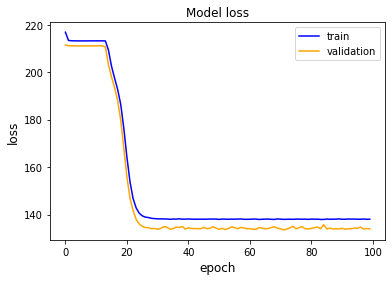

In [20]:
plt.plot(model.history['loss'], color='blue')
plt.plot(model.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [21]:
from mavenn.src.utils import x_to_stats
stats = x_to_stats(x=x_test, alphabet=model.alphabet)
x_ohe_test = stats.pop('x_ohe')

In [22]:
#phi_test = model.x_to_phi(x_test)

In [23]:
#model.get_nn().layers

In [24]:
import tensorflow as tf
import tensorflow.keras.backend as K


y_hat_functions = []
yhats = []

phi_function = K.function([model.model.layers[0].input], [model.model.layers[2].output])
phi_test = np.squeeze(phi_function(np.hstack([x_ohe_test,y_test])))

for _ in range(y_train.shape[1]):
    y_hat_functions.append(K.function([model.model.layers[0].input], [model.model.layers[2*_+3].output]))
    yhats.append(np.squeeze(y_hat_functions[_](np.hstack([x_ohe_test,y_test]))))

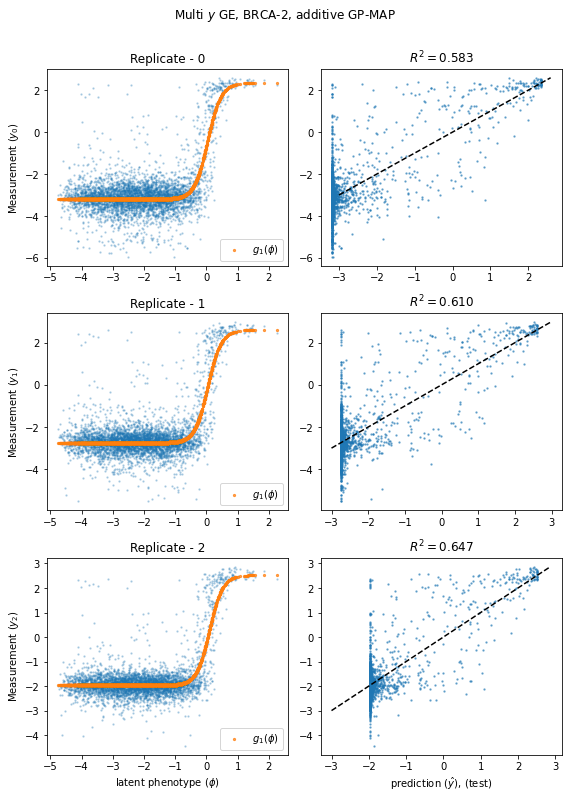

In [25]:
fig, ax = plt.subplots(y_train.shape[1],2,figsize=(8,11))

for _ in range(y_train.shape[1]):

    ax[_,0].set_title(f'Replicate - {_}')
    ax[_,0].scatter(phi_test,y_test[:,_], s=2,alpha=0.25)
    ax[_,0].scatter(phi_test,y_test[:,_].mean()+y_test[:,_].std()*yhats[_],s=5,alpha=0.75,label=f'$g_{1}(\phi)$')
    #ax[_,0].set_xlabel('latent phenotype $(\phi)$')
    ax[_,0].set_ylabel(f'Measurement $(y_{_})$')
    ax[_,0].legend()

    Rsq = np.corrcoef(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_])[0][1]**2
    ax[_,1].set_title('$R^2 = $' + str(Rsq)[0:5])
    ax[_,1].scatter(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_],s=2,alpha=0.5)
    #diag = np.linspace(min(y_test[:,_]),max(y_test[:,_]),100)
    diag = np.linspace(-3,max(y_test[:,_]),100)
    ax[_,1].plot(diag,diag,'--',color='black')

ax[_,0].set_xlabel('latent phenotype $(\phi)$')
ax[_,1].set_xlabel('prediction $(\hat y)$, (test)')
    
fig.suptitle('Multi $y$ GE, BRCA-2, additive GP-MAP',y=1.005)    
fig.tight_layout()
#fig.savefig('Multi_y_GE_regression_MPSA.png',bbox_inches='tight',dpi=300)

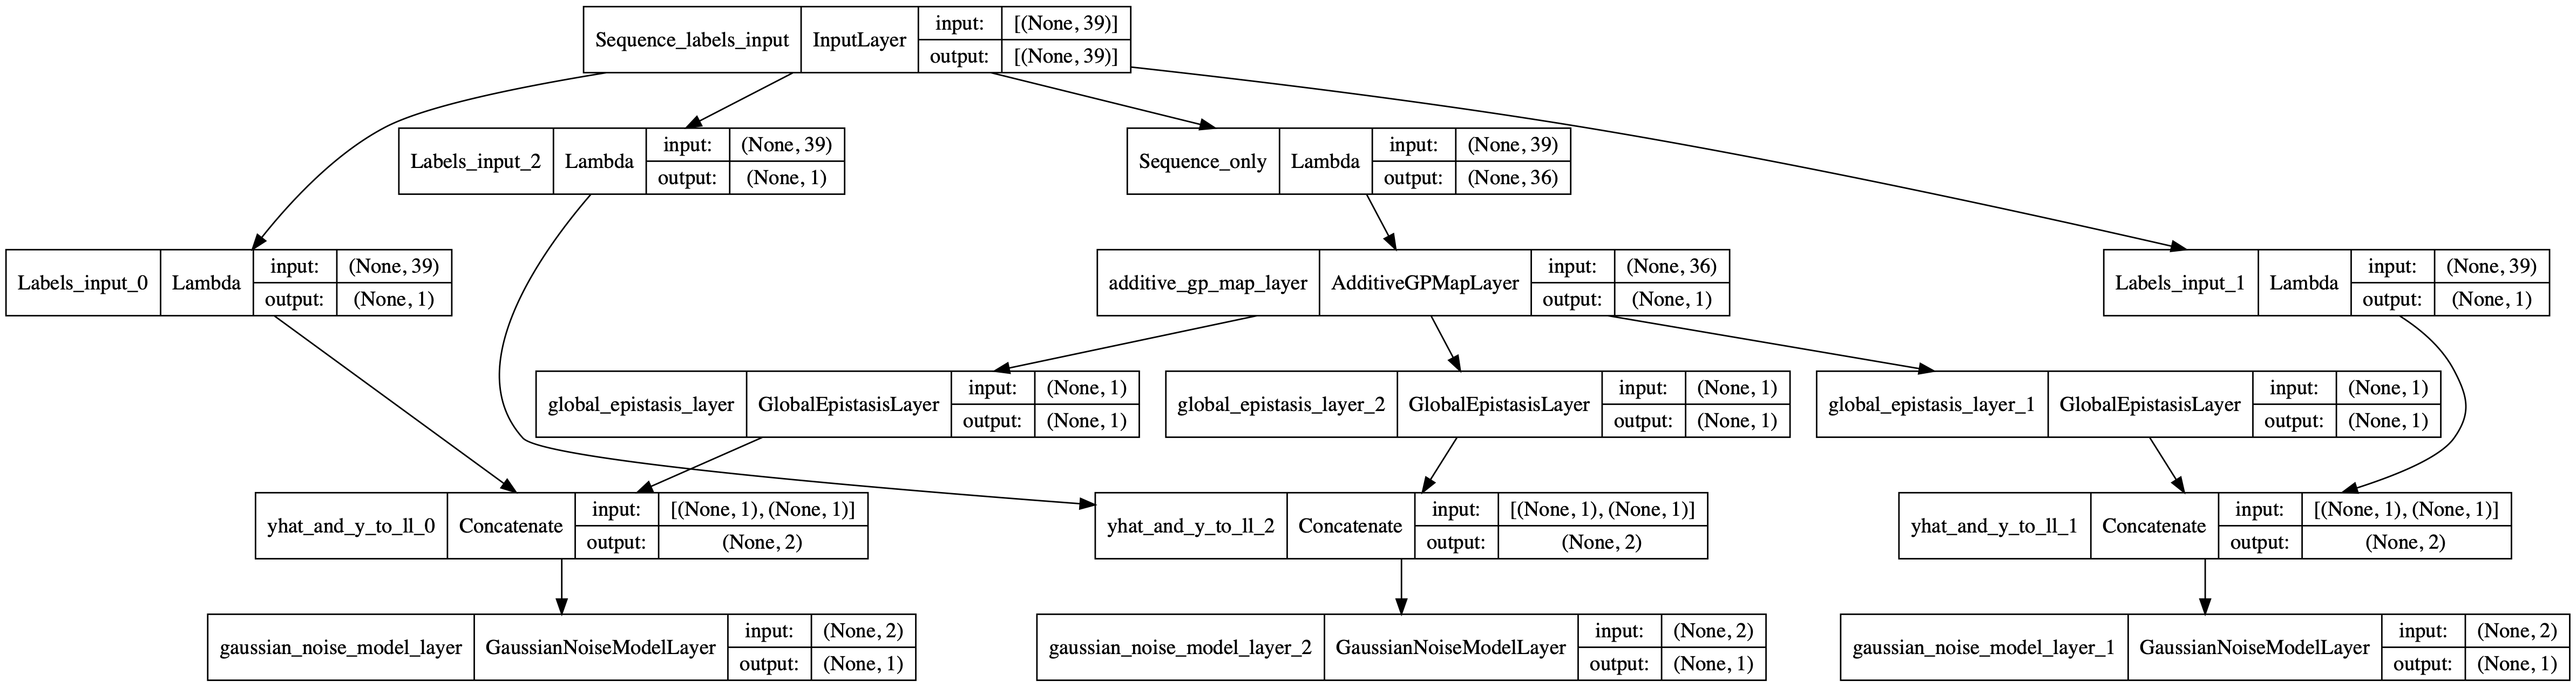

In [26]:

from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)